<a href="https://colab.research.google.com/github/zhrkhirnsa/Mini-Project/blob/main/Mini_Project_Zahra_Khairunnisa_3333210040.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

Dataset ini adalah dataset Real Estate di USA yang dibuat oleh Ahmed Shahriar Sakib pada 01 Mei 2023. Di dalam dataset ini diantaranya berisi status, bed, bath, acre lot, city, state, zip code, house size, prev sold date, dan price.

Deskripsi dan download dataset ada pada link: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

**1.1 Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [ ]:
!gdown --id 1rbIsMZfoQDnaxde9nTPe8ashPmmjew0P

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rbIsMZfoQDnaxde9nTPe8ashPmmjew0P
To: /content/Dataset Andat.csv
100% 6.74M/6.74M [00:00<00:00, 209MB/s]


In [ ]:
import pandas as pd
dataset = pd.read_csv('Dataset Andat.csv')
dataset

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0


## 2. Exploratory Data

In [ ]:
dataset.shape

(100000, 10)

Terdapat 100.000 data dengan 10 kolom atau fitur.

In [ ]:
dataset.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [ ]:
dataset.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [ ]:
dataset.nunique()

status               2
bed                 28
bath                24
acre_lot          1613
city               525
state               12
zip_code           757
house_size        3578
prev_sold_date    3604
price             1999
dtype: int64

Karena data non-null masih terdapat perbedaan nilai yang berarti terdapat missing value, jadi kita perlu melakukan penanganan untuk missing value-nya.

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [ ]:
dataset.isnull().sum()

status                0
bed               24950
bath              24888
acre_lot          14013
city                 52
state                 0
zip_code            195
house_size        24918
prev_sold_date    71255
price                 0
dtype: int64

Dari hasil di atas ternyata terdapat 7 fitur yang missing value yaitu bed, bath, acre lot, city, zip code, house size, dan prev sold date.

In [ ]:
dataset['bed'].dtypes

dtype('float64')

In [ ]:
dataset['bath'].dtypes

dtype('float64')

In [ ]:
dataset['acre_lot'].dtypes

dtype('float64')

In [ ]:
dataset['city'].dtypes

dtype('O')

In [ ]:
dataset['zip_code'].dtypes

dtype('float64')

In [ ]:
dataset['house_size'].dtypes

dtype('float64')

In [ ]:
dataset['prev_sold_date'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Selanjutnya, kita melakukan imputer berdasarkan subjek missing value yang termasuk dalam data numerical, yaitu bed, bath, acre lot, zip code, dan house size. Dipilih data yang numerical karena supaya bisa di filling (diganti dnegan data yang lain) nantinya, karena kalo datanya bentuk string tidak bisa di filling.

In [ ]:
imputer = imputer.fit(dataset[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size']])
imputer

SimpleImputer()

In [ ]:
dataset[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size']] = imputer.transform(dataset[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size']])
dataset.isnull().sum()

status                0
bed                   0
bath                  0
acre_lot              0
city                 52
state                 0
zip_code              0
house_size            0
prev_sold_date    71255
price                 0
dtype: int64

Setelah melakukan transform imputer, maka data-data numerical tadi sudah tidak missing value, kecuali fitur city dan prev sold date karena dua fitur tersebut merupakan categorical data.

Using drop column tohandle missing value on categorical or object data

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

status        0
bed           0
bath          0
acre_lot      0
state         0
zip_code      0
house_size    0
price         0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
dataset.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05
mean,3.701013,2.494595,13.613473,2132.003467,2.180082e+03,4.383656e+05
std,1.811782,1.363553,779.057857,2453.259319,4.874350e+03,1.015773e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,4.450000e+02
25%,3.000000,2.000000,0.230000,972.000000,1.344000e+03,1.250000e+05
50%,3.701013,2.494595,0.790000,1225.000000,2.180082e+03,2.650000e+05
75%,4.000000,3.000000,5.800000,1612.000000,2.214000e+03,4.749000e+05
max,86.000000,56.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


<Axes: >

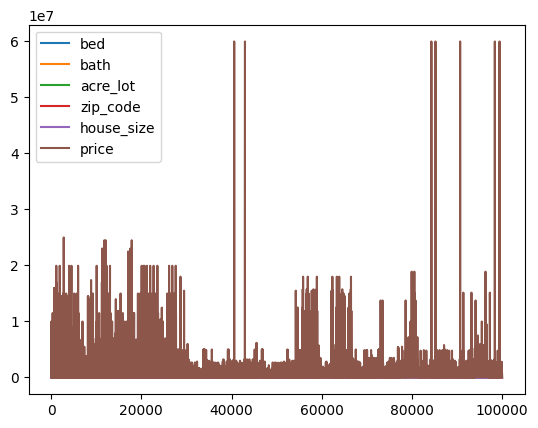

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

dari visualisasi data di atas dapat disimpulkan bahwa 'price' adalah fitur yang terdapat outlier. Tetapi untuk memastikan lagi, kita dapat gunakan code dibawah.

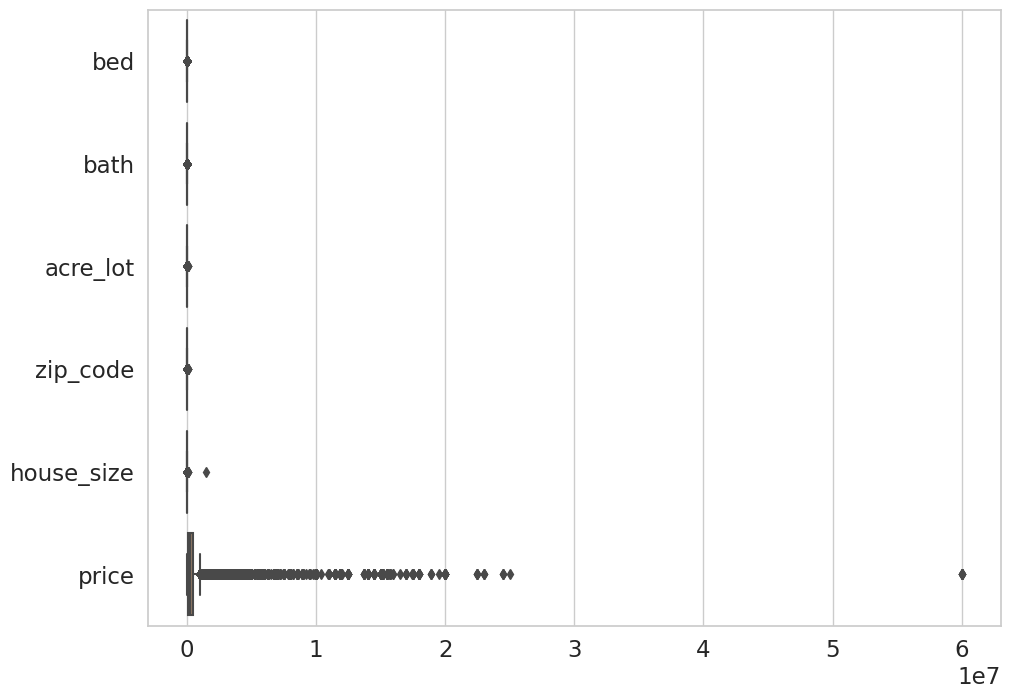

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Ternyata betul bahwa 'price' ada outlier dan ternyata ada juga 'house size' terdapat satu outlier. Lalu, kita bersihkan outliernya.

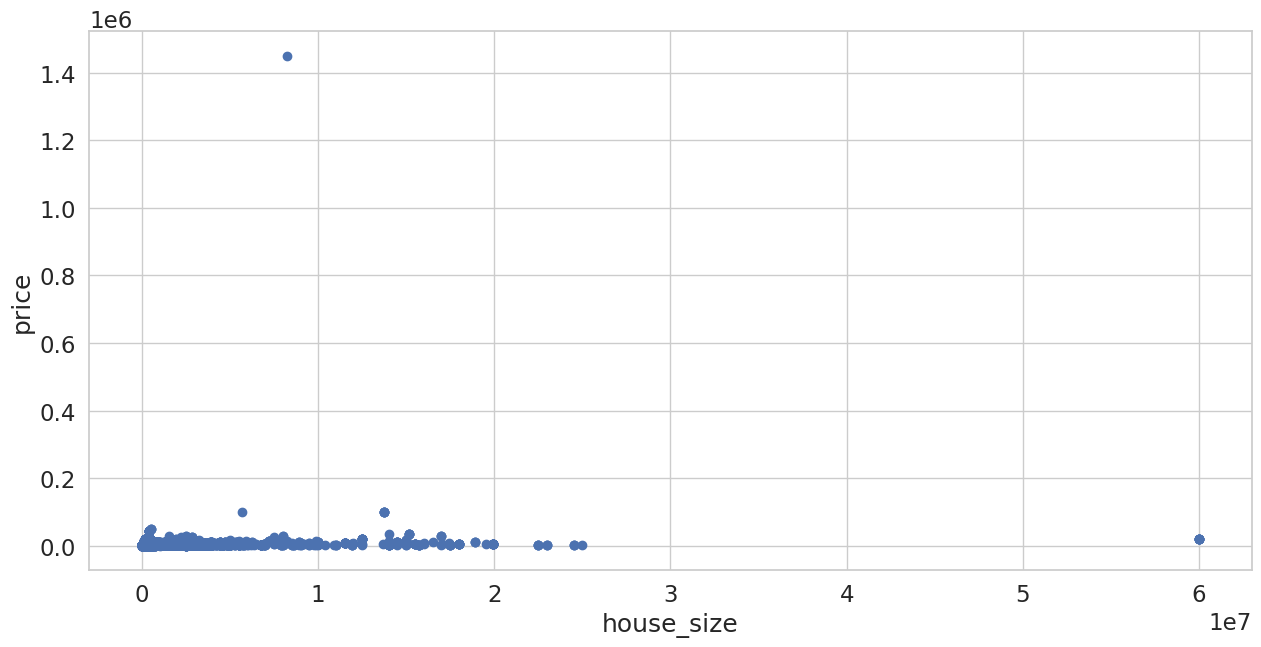

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['price'], dataset['house_size'])
 
# x-axis label
ax.set_xlabel('house_size')
 
# y-axis label
ax.set_ylabel('price')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['price'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['price'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (100000, 8)


Panjang data awalnya adalah 100.000

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['price'] > upper].index
outliers_lower = dataset[dataset['price'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (93806, 8)


<ipython-input-26-9a6f7cfe1225>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


Setelah dihapus outlier untuk fitur 'price', jadi terdapat 93.806 data yang tersisa.

In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['house_size'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['house_size'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (93806, 8)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['house_size'] > upper].index
outliers_lower = dataset[dataset['house_size'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (88072, 8)


<ipython-input-28-7e89cd26060a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


Setelah outlier untuk fitur house size dihapus, terdapat 88.072 data.

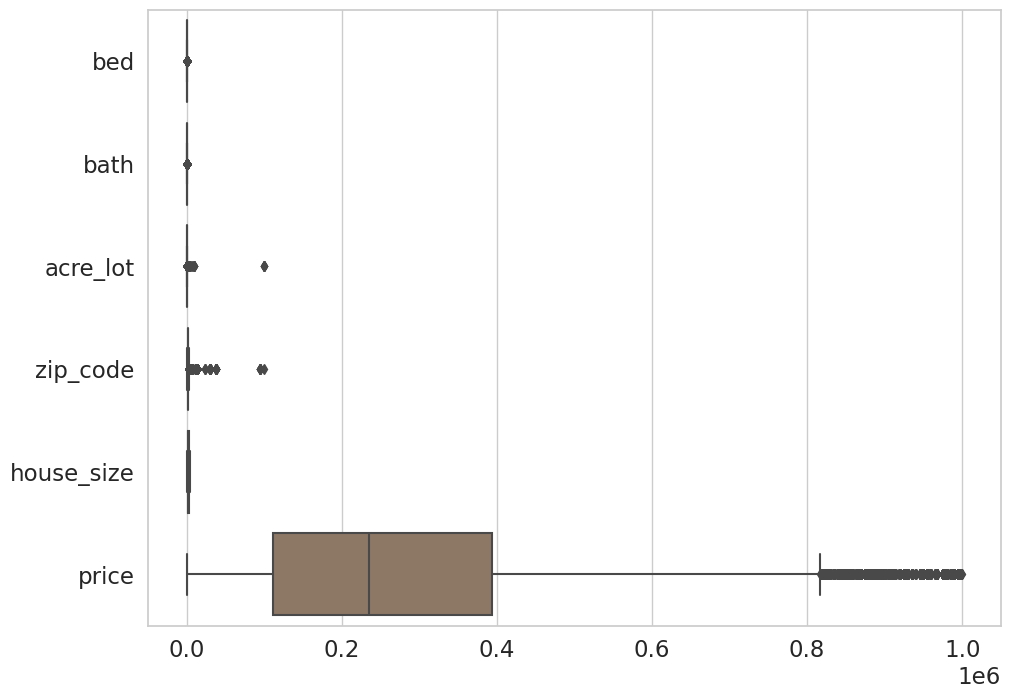

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['acre_lot'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['acre_lot'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (88072, 8)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['acre_lot'] > upper].index
outliers_lower = dataset[dataset['acre_lot'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (83364, 8)


<ipython-input-32-86c191d889e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['zip_code'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['zip_code'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (83364, 8)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['zip_code'] > upper].index
outliers_lower = dataset[dataset['zip_code'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)

New Shape:  (66509, 8)


<ipython-input-34-b9a1ede4d23d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


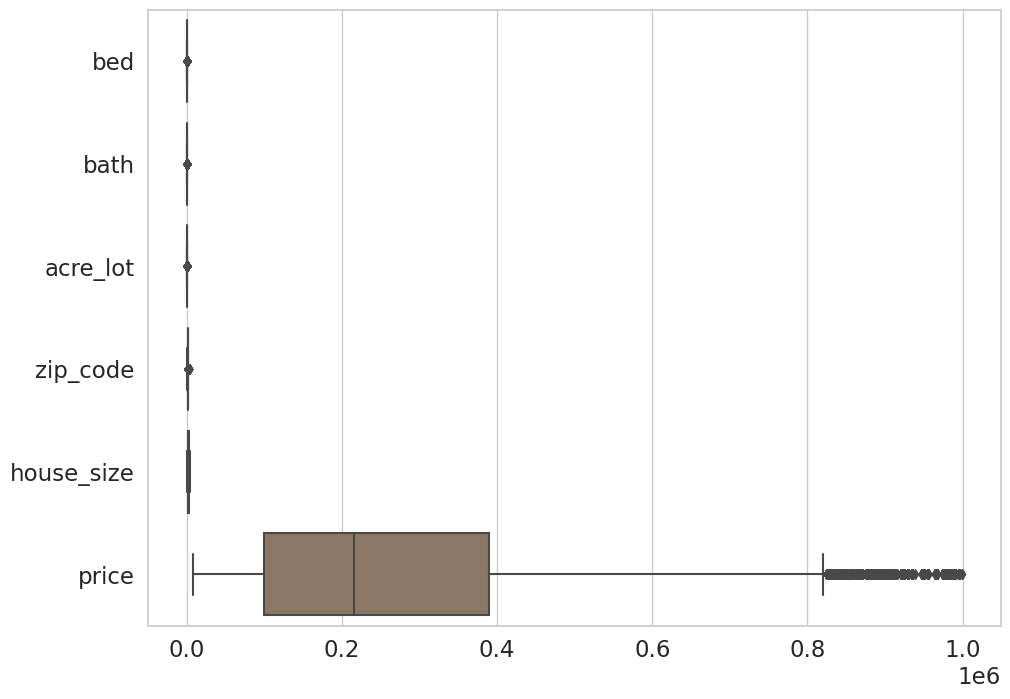

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

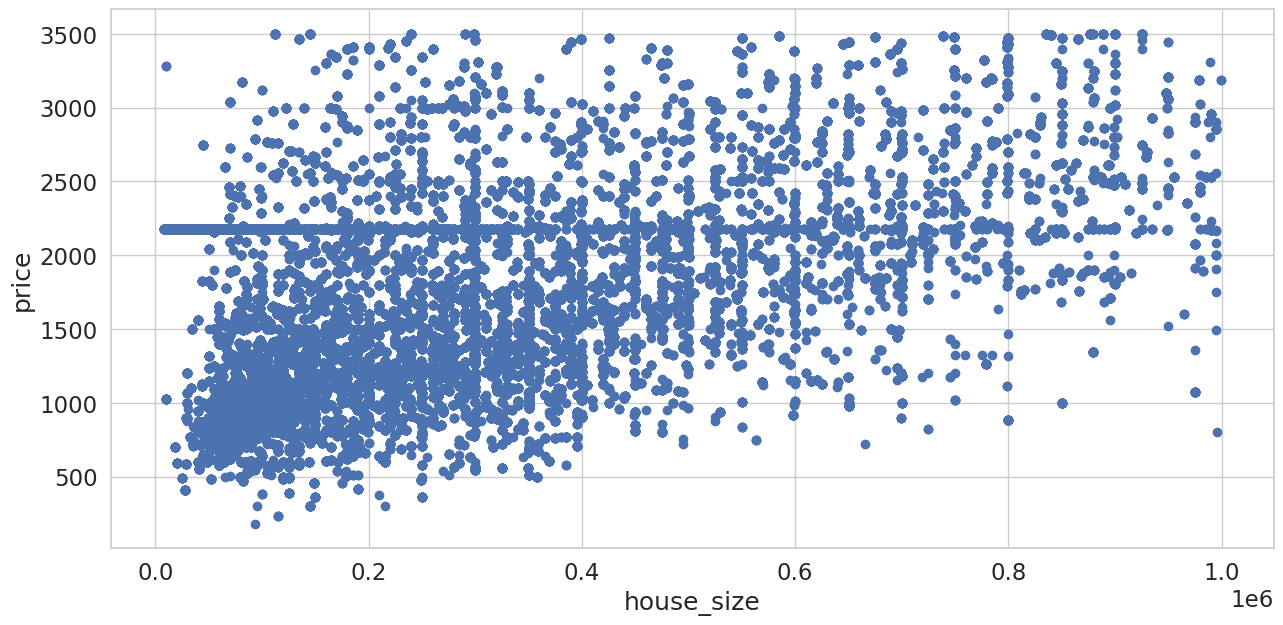

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['price'], dataset['house_size'])
 
# x-axis label
ax.set_xlabel('house_size')
 
# y-axis label
ax.set_ylabel('price')
plt.show()

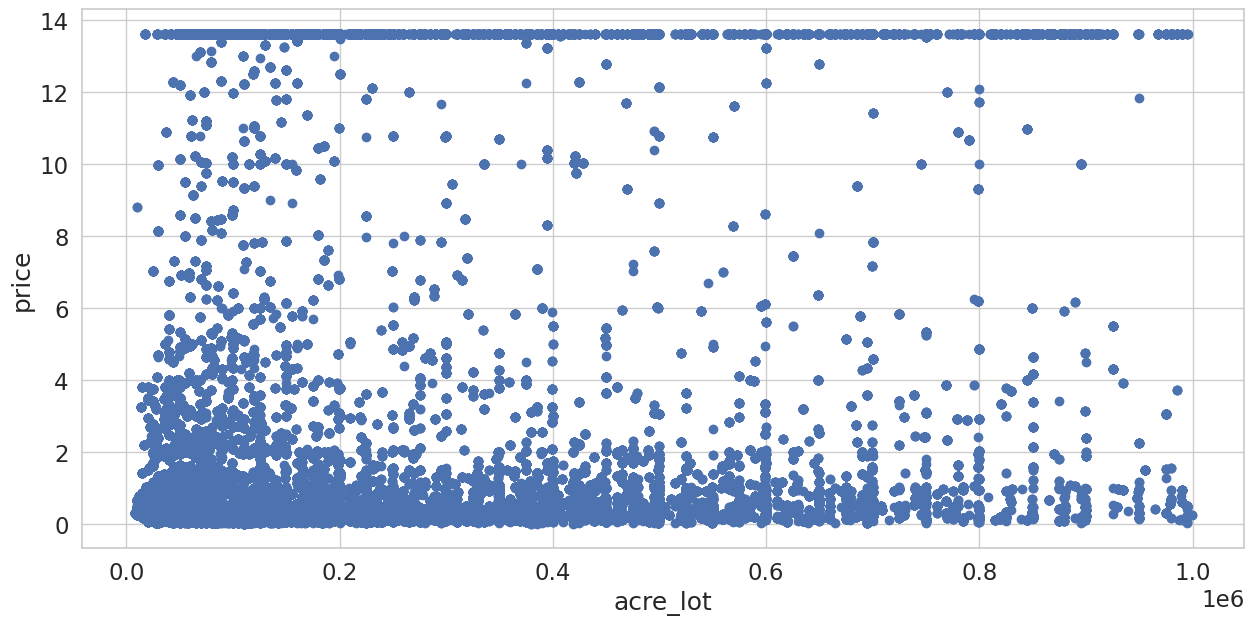

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['price'], dataset['acre_lot'])
 
# x-axis label
ax.set_xlabel('acre_lot')
 
# y-axis label
ax.set_ylabel('price')
plt.show()

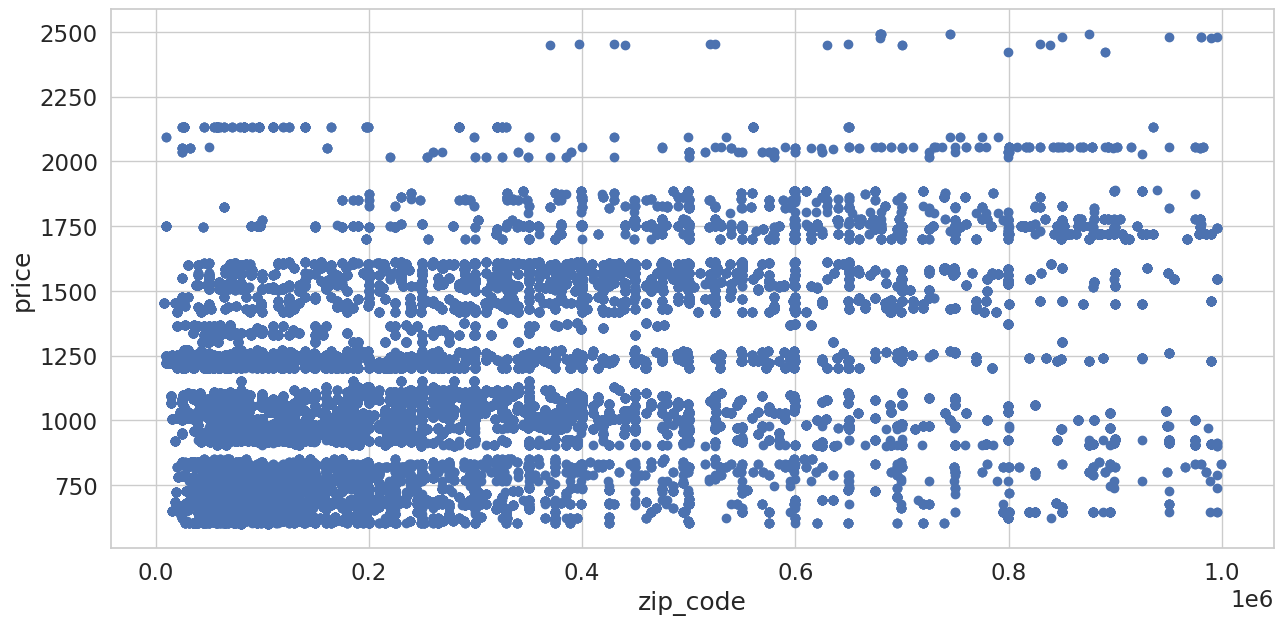

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['price'], dataset['zip_code'])
 
# x-axis label
ax.set_xlabel('zip_code')
 
# y-axis label
ax.set_ylabel('price')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

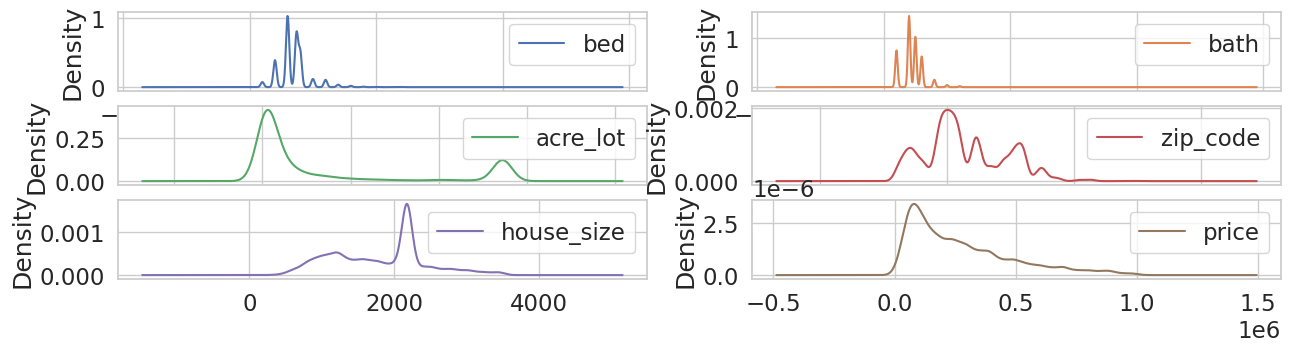

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

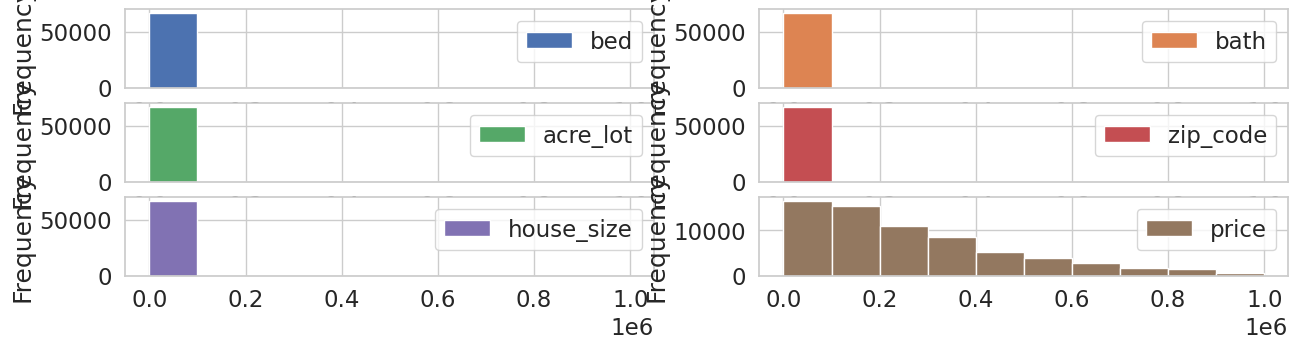

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

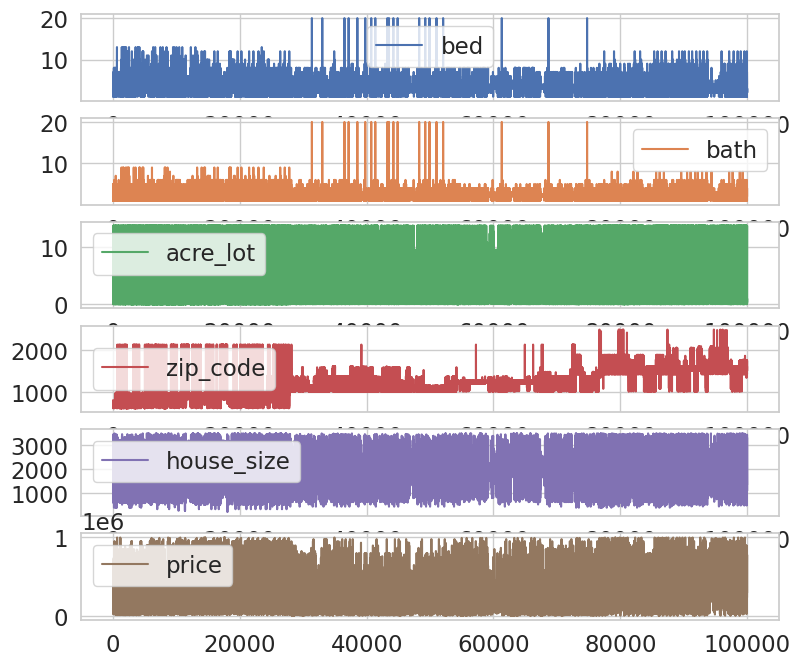

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(15,1),figsize=(9,20), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

Correlation Matrix digunakan untuk membaca keterkaitan antarfitur.

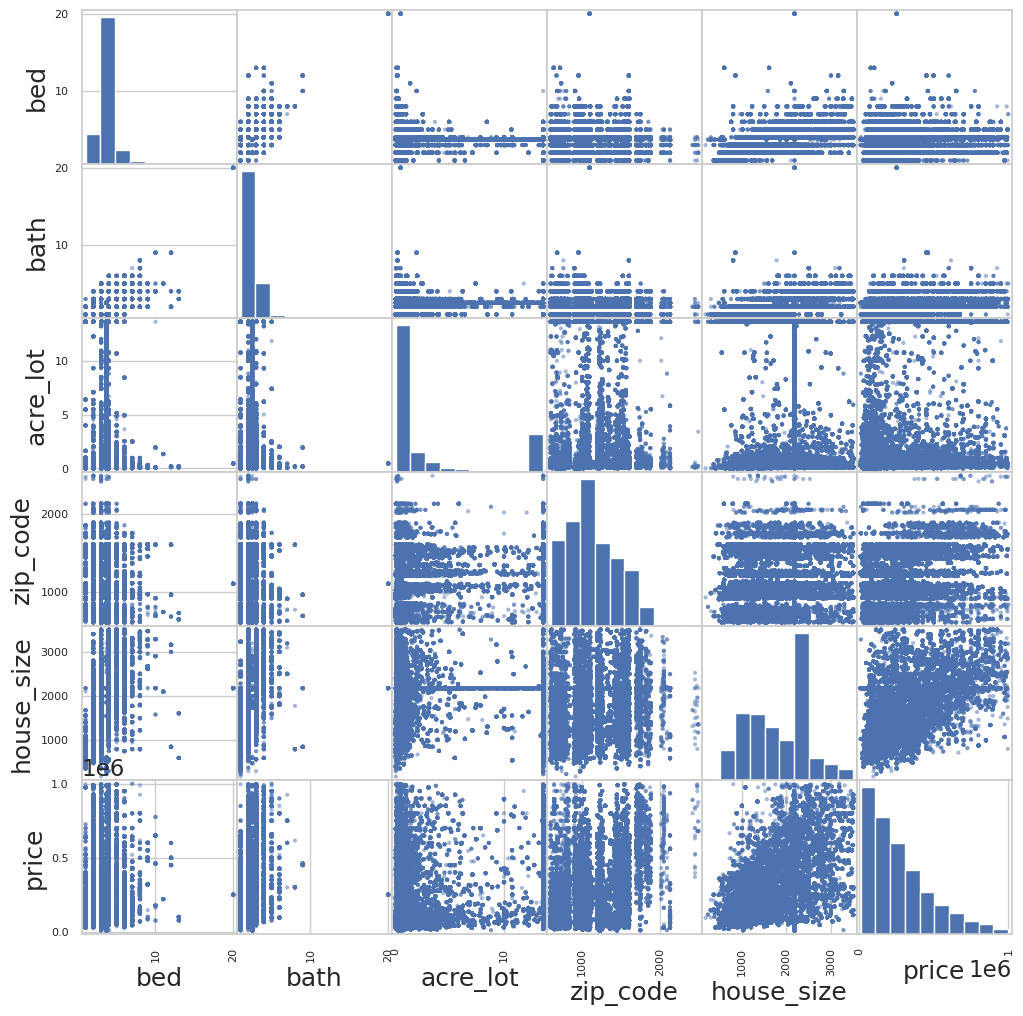

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

Warna hijau = korelasi tinggi
Warna merah gelap = korelasi paling buruk atau rendah.




<ipython-input-43-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


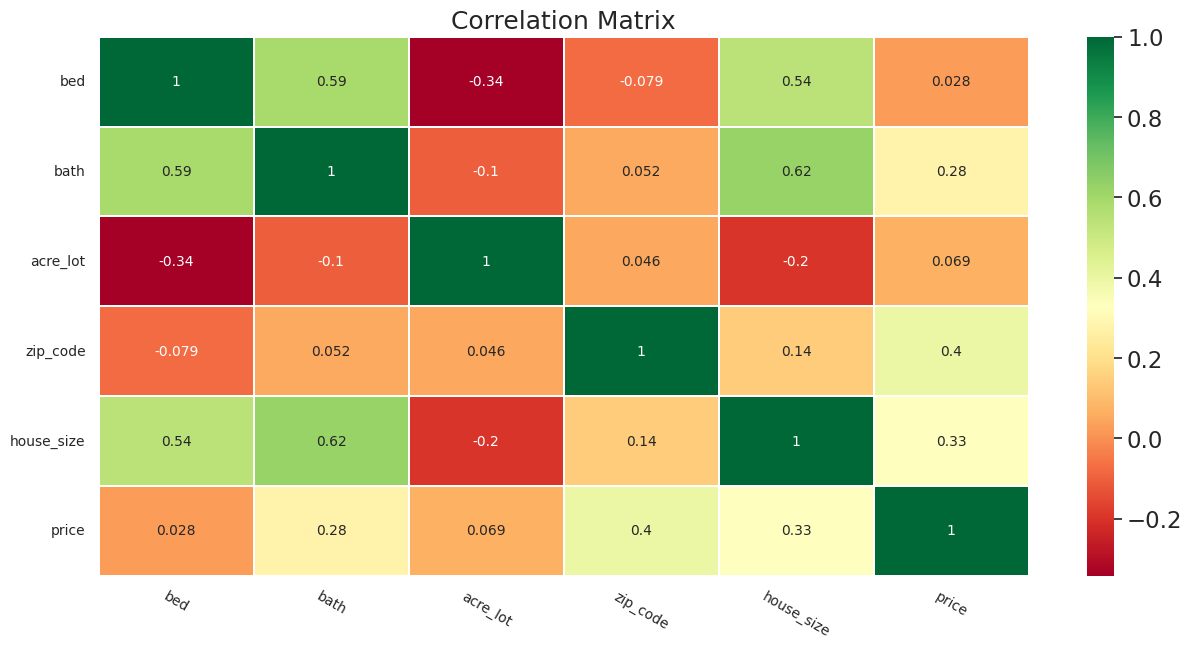

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

Kita gunakan fitur "status" karena memiliki nunique value paling sedikit, yaitu 2.

In [ ]:
x = dataset.drop('status', axis=1)
x

,bed,bath,acre_lot,state,zip_code,house_size,price
0,3.0,2.0,0.120000,Puerto Rico,601.0,920.000000,105000.0
1,4.0,2.0,0.080000,Puerto Rico,601.0,1527.000000,80000.0
2,2.0,1.0,0.150000,Puerto Rico,795.0,748.000000,67000.0
3,4.0,2.0,0.100000,Puerto Rico,731.0,1800.000000,145000.0
4,6.0,2.0,0.050000,Puerto Rico,680.0,2180.081737,65000.0
...,...,...,...,...,...,...,...
99994,2.0,2.0,1.400000,Massachusetts,1562.0,1225.000000,385000.0
99995,3.0,3.0,13.613473,Massachusetts,1749.0,2864.000000,749900.0
99996,2.0,1.0,0.340000,Massachusetts,1501.0,1075.000000,349900.0
99997,3.0,2.0,1.010000,Massachusetts,1545.0,1632.000000,549000.0


Choose feature Type as a label

In [ ]:
y = dataset["status"]
y

0        for_sale
1        for_sale
2        for_sale
3        for_sale
4        for_sale
           ...   
99994    for_sale
99995    for_sale
99996    for_sale
99997    for_sale
99998    for_sale
Name: status, Length: 66509, dtype: object

In [ ]:
y.values.reshape(-1,1)

array([['for_sale'],
       ['for_sale'],
       ['for_sale'],
       ...,
       ['for_sale'],
       ['for_sale'],
       ['for_sale']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

,bed,bath,acre_lot,zip_code,house_size,price,state_Massachusetts,state_New York,state_Puerto Rico,state_Virgin Islands
0,3.0,2.0,0.120000,601.0,920.000000,105000.0,0,0,1,0
1,4.0,2.0,0.080000,601.0,1527.000000,80000.0,0,0,1,0
2,2.0,1.0,0.150000,795.0,748.000000,67000.0,0,0,1,0
3,4.0,2.0,0.100000,731.0,1800.000000,145000.0,0,0,1,0
4,6.0,2.0,0.050000,680.0,2180.081737,65000.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99994,2.0,2.0,1.400000,1562.0,1225.000000,385000.0,1,0,0,0
99995,3.0,3.0,13.613473,1749.0,2864.000000,749900.0,1,0,0,0
99996,2.0,1.0,0.340000,1501.0,1075.000000,349900.0,1,0,0,0
99997,3.0,2.0,1.010000,1545.0,1632.000000,549000.0,1,0,0,0


In [ ]:
x.shape

(66509, 10)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9
0,-0.383099,-0.257377,-0.634904,-1.706960,-1.346947,-0.782628,-1.360528,-0.006716,1.456021,-0.176441
1,0.448323,-0.257377,-0.642941,-1.706960,-0.416635,-0.899168,-1.360528,-0.006716,1.456021,-0.176441
2,-1.214522,-1.371884,-0.628877,-1.092322,-1.610561,-0.959769,-1.360528,-0.006716,1.456021,-0.176441
3,0.448323,-0.257377,-0.638923,-1.295089,0.001776,-0.596164,-1.360528,-0.006716,1.456021,-0.176441
4,2.111168,-0.257377,-0.648968,-1.456669,0.584304,-0.969092,-1.360528,-0.006716,1.456021,-0.176441
...,...,...,...,...,...,...,...,...,...,...
66504,-1.214522,-0.257377,-0.377737,1.337716,-0.879492,0.522619,0.735009,-0.006716,-0.686803,-0.176441
66505,-0.383099,0.857131,2.076100,1.930177,1.632505,2.223636,0.735009,-0.006716,-0.686803,-0.176441
66506,-1.214522,-1.371884,-0.590704,1.144454,-1.109388,0.358997,0.735009,-0.006716,-0.686803,-0.176441
66507,-0.383099,-0.257377,-0.456093,1.283856,-0.255708,1.287121,0.735009,-0.006716,-0.686803,-0.176441


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9
0,0.105263,0.052632,0.008815,0.000000,0.222657,0.097972,0.0,0.0,1.0,0.0
1,0.157895,0.052632,0.005877,0.000000,0.405544,0.072747,0.0,0.0,1.0,0.0
2,0.052632,0.000000,0.011018,0.102537,0.170835,0.059631,0.0,0.0,1.0,0.0
3,0.157895,0.052632,0.007346,0.068710,0.487798,0.138331,0.0,0.0,1.0,0.0
4,0.263158,0.052632,0.003673,0.041755,0.602314,0.057613,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
66504,0.052632,0.052632,0.102839,0.507928,0.314553,0.380486,1.0,0.0,0.0,0.0
66505,0.105263,0.105263,1.000000,0.606765,0.808376,0.748663,1.0,0.0,0.0,0.0
66506,0.052632,0.000000,0.024975,0.475687,0.269358,0.345071,1.0,0.0,0.0,0.0
66507,0.105263,0.052632,0.074191,0.498943,0.437180,0.545959,1.0,0.0,0.0,0.0


**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'for_sale': 53102, 'ready_to_build': 105})
Test distribution Counter({'for_sale': 13276, 'ready_to_build': 26})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998008 (0.000413)


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9979702300405954


[[13275     1]
 [   26     0]]


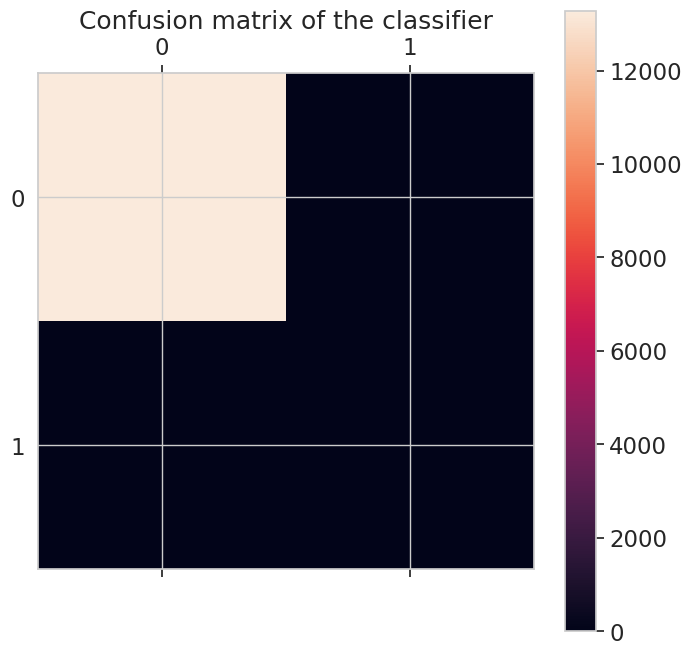

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

                precision    recall  f1-score   support

      for_sale       1.00      1.00      1.00     13276
ready_to_build       0.00      0.00      0.00        26

      accuracy                           1.00     13302
     macro avg       0.50      0.50      0.50     13302
  weighted avg       1.00      1.00      1.00     13302

